# DBSpace

#### Overview of directory and files
The Activa PC+S stores recordings downloaded from a patient in a patient-specific directory. 

Within the patient directory, folders are created for each download session. Each folder is labeled according to the patient, date, and time of the download session.

Within the folder are the files related to the PC+S LFP recordings. Three filetypes exist: txt (data), xml (select metadata), and .log (per-recording log files).

## Loading in Brain Radio Data

In this notebook we'll cover the basics of loading in Brain Radio LFP data.

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import signal

import sys
sys.path.append("../../")

In [2]:
import DBSpace as dbo

## Setting up our library
The first step is to load in the DBSpace library. The library has several sub-libraries, but for now we're interested in the top-level DBSpace module and its constituents.

## Setting up our class
We'll define a new installation of our class. This object will be the primary object associated with the data $X_{ephys}$ and will be passed along to analysis classes.

## Loading in a file

First, we will load in a file using the DBSpace load_file function.

In [12]:
# import lfp data
lfp_file = '/Users/mosadoluwaobatusin/Documents/projects/MaybergLab/Session_2018_05_07_Monday/DBS910_2018_04_30_14_29_52__MR_0.txt'

## Plot raw time series of data

While this view is helpful, especially in identifying artifacts, the oscillatory domain is where features of disease are being identified

In [13]:
data = np.loadtxt(lfp_file, delimiter=',', unpack=False)
ch1 = data[:,0]
ch2 = data[:,2]

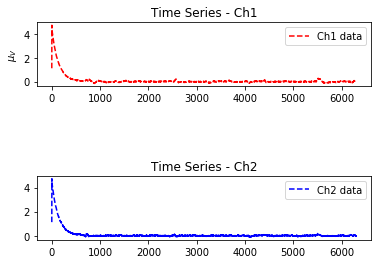

In [43]:
# Plot raw time series for Ch1 data
ax1 = plt.subplot(311)
plt.plot(ch1, 'r--',label='Ch1 data' )
plt.title('Time Series - Ch1' )
plt.legend()
plt.ylabel(r'$\mu_V$')

# Plot raw time series for Ch1 data
ax2 = plt.subplot(313)
plt.plot(ch2, 'b--',  label='Ch2 data')
plt.title('Time Series - Ch2' )
plt.legend()

## Plot frequency-domain transformation
Next, we'll do a frequency-domain transformation of both channels and plot them

In [17]:
NFFT = 1024       # the length of the windowing segments
# Fs = 422  # the sampling frequency
fs = 422  # the sampling frequency

/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


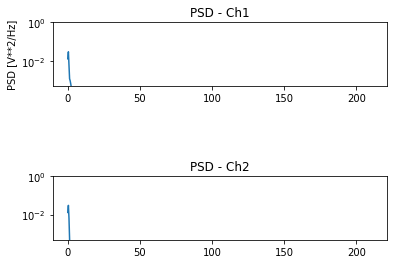

In [44]:
# Plot power spectral density using Welch's method for Ch1 data
plt.subplot(311)
f1, Pxx_den1 = signal.welch(ch1, fs, nperseg=844, noverlap=422, nfft=1024)
plt.semilogy(f1, Pxx_den1)
plt.ylim([0.5e-3, 1])
plt.title('PSD - Ch1' )
plt.ylabel('PSD [V**2/Hz]')
# Plot power spectral density using Welch's method for Ch2 data
plt.subplot(313)
f2, Pxx_den2 = signal.welch(ch2, fs, nperseg=844, noverlap=422, nfft=1024)
plt.semilogy(f2, Pxx_den2)
plt.ylim([0.5e-3, 1])
plt.title('PSD - Ch2' )

plt.show()

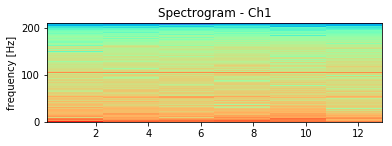

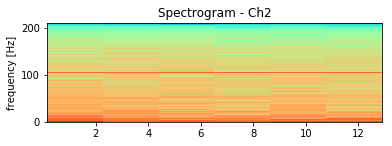

In [41]:
ax1 = plt.subplot(211)
plt.specgram(ch1, Fs=fs, NFFT = 1024, cmap = matplotlib.cm.rainbow )
plt.ylabel('frequency [Hz]')
plt.title('Spectrogram - Ch1' )
plt.show()

ax2 = plt.subplot(212)
plt.specgram(ch2, Fs=fs, NFFT = 1024, cmap = matplotlib.cm.rainbow )
plt.ylabel('frequency [Hz]')
plt.title('Spectrogram - Ch2' )
plt.show()

## Data structure
#### Loading in the data structure
A BrainRadio Frame (BRFrame) is used to load in chronic LFP data captured over the course of weeks/months.

We'll demonstrate the loading in of a BRFrame object.

In [6]:
dbo.br_load_dict(file)

AttributeError: module 'DBSpace' has no attribute 'br_load_dict'

### Preprocessing and Cleaning

The Activa PC+S contains several noise and artifact processes.

For the work done in this lab, noise will be defined as uncorrelated signal components from non-neural sources and artifact will be defined as correlated signal components from non-neural sources. This distinction is important as *averaging* eliminates uncorrelated signal components as the ensemble size approaches infinity while averaging does nothing to the correlated signal components.

#### Stimulation artifacts
Stimulation artifacts are the largest signals found in the LFP recording.

Below is an example PSD from a recording taken in saline. There are no neural elements in this recording so the PSD features found here are known to be noise and/or artifact.


(FIGURE)

#### Temperature artifacts
Temperature-related artifacts are evident in PC+S recordings. Below is a raster PSD demonstrating a dependence of specific features of the PSD to the ambient saline temperature of the recording.

(FIGURE)

### Example Usage: Distribution of $\alpha$ power changes

Let's use our Frame 